In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.extensions import UnitaryGate
from math import pi
from qiskit.providers.fake_provider import FakeVigo
from qiskit.quantum_info import state_fidelity

aer_sim = AerSimulator()
vigo = FakeVigo()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

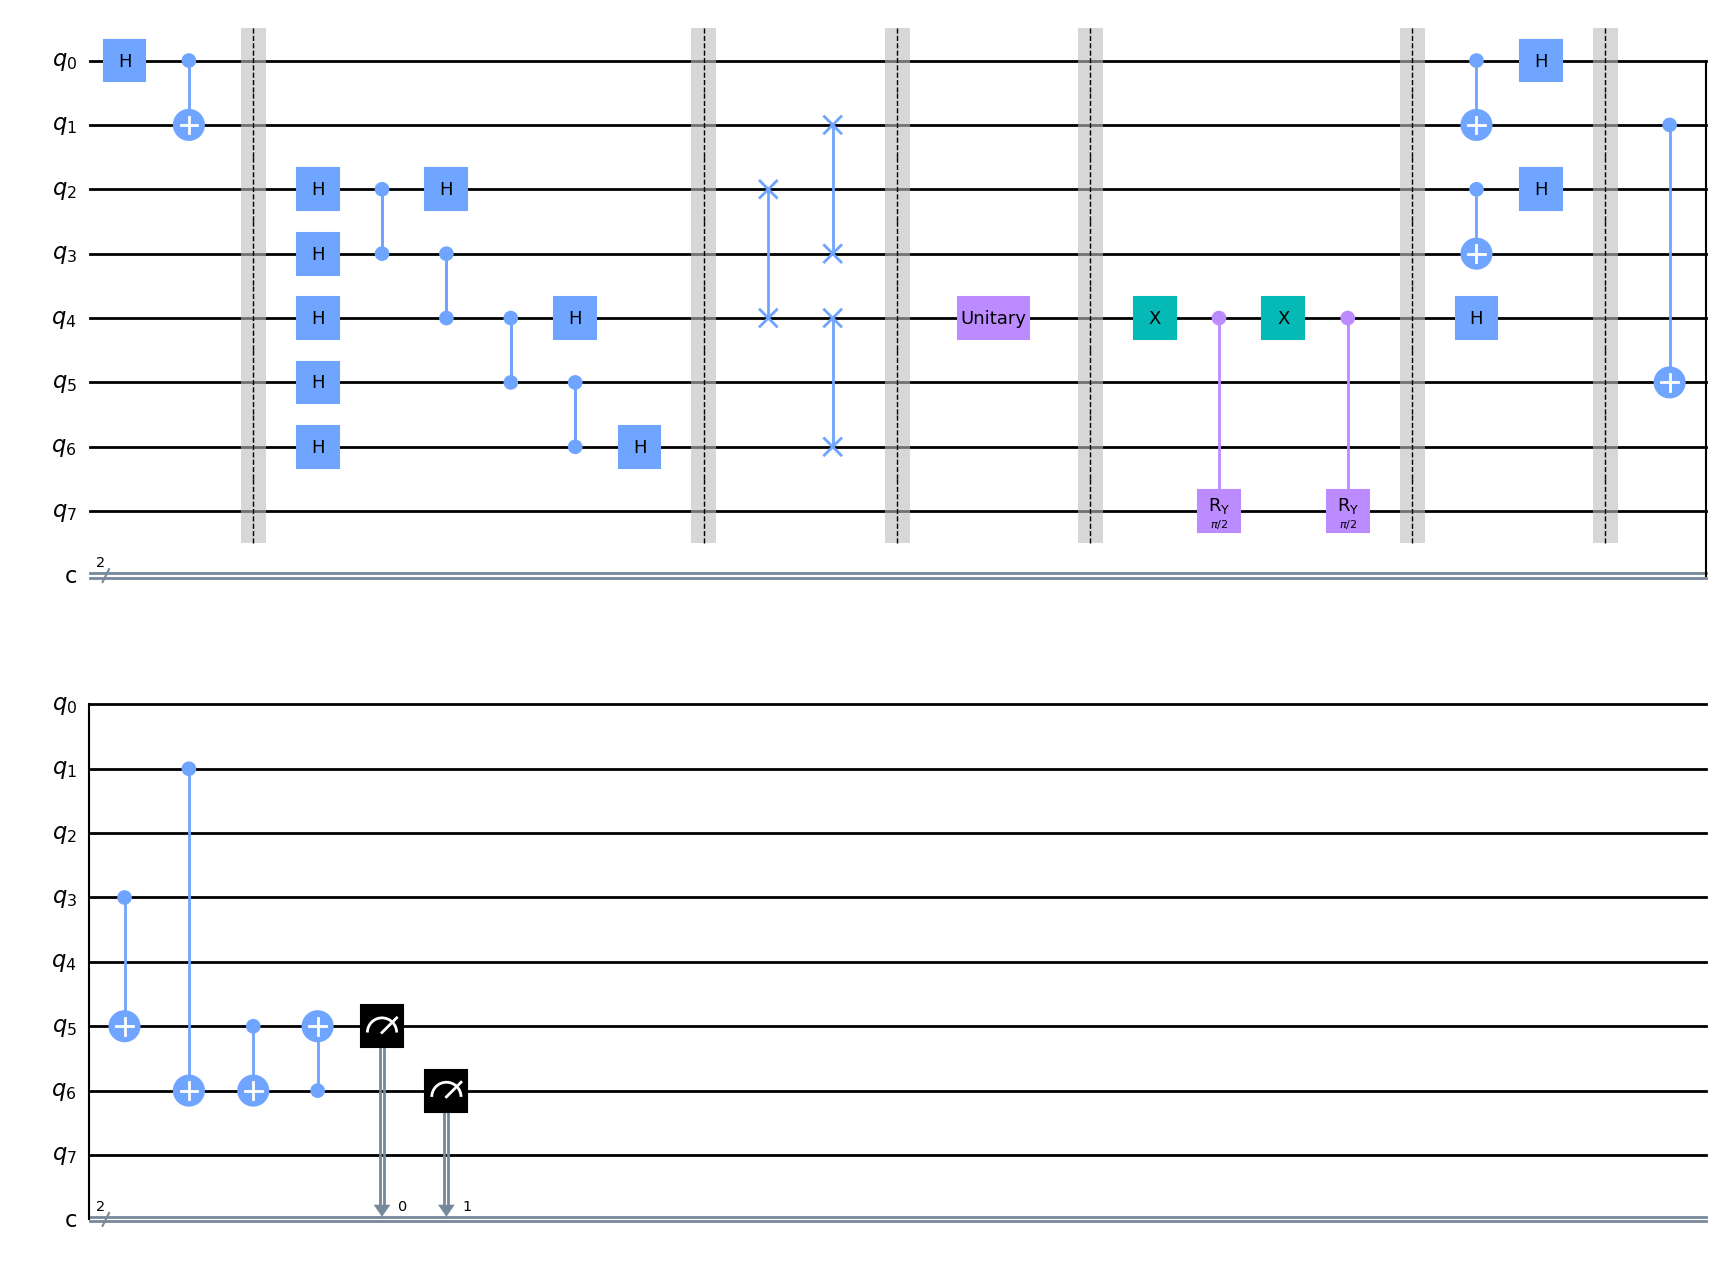

In [11]:
qc = QuantumCircuit(8,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()

for i in range(2,7):
    qc.h(i)
for i in range(2,6):
    qc.cz(i,i+1)


qc.h(2)
qc.h(4)
qc.h(6)
qc.barrier()

qc.swap(2,4)
qc.swap(4,6)
qc.swap(1,3)
qc.barrier()


matrix = [[0.5,(np.sqrt(3)/2)],
          [(-np.sqrt(3))/2,0.5]]
gate = UnitaryGate(matrix)
qc.append(gate,[4])
qc.barrier()

qc.x(4)
qc.cry((pi/2),4,7)
qc.x(4)
qc.cry((pi/2),4,7)
qc.barrier()





qc.cx(0,1)
qc.h(0)
qc.cx(2,3)
qc.h(2)
qc.h(4)
qc.barrier()






qc.cx(1,5)
qc.cx(3,5)
qc.cx(1,6)
qc.cx(5,6)
qc.cx(6,5)
qc.measure([5,6],[0,1])
qc.draw()


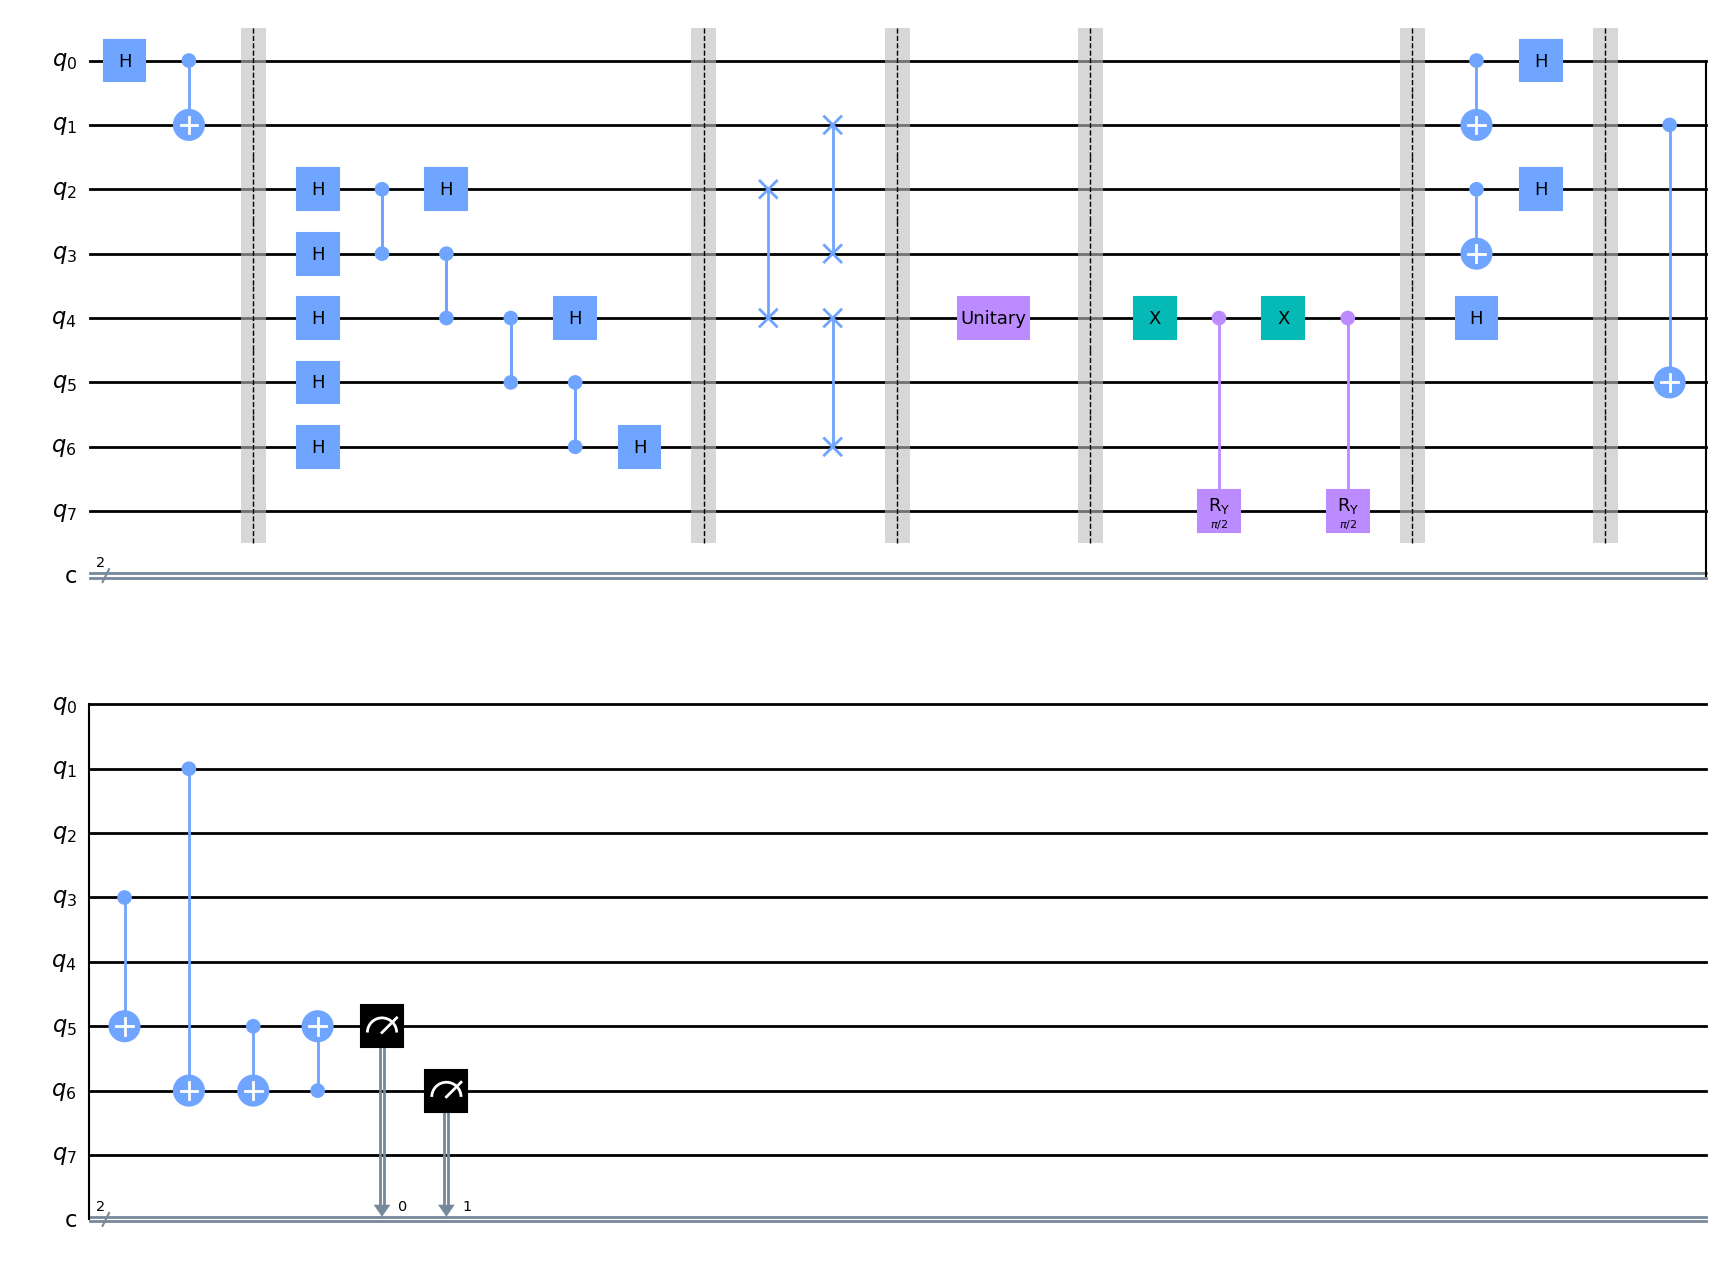

In [11]:
qc = QuantumCircuit(8,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()

for i in range(2,7):
    qc.h(i)
for i in range(2,6):
    qc.cz(i,i+1)


qc.h(2)
qc.h(4)
qc.h(6)
qc.barrier()

qc.swap(2,4)
qc.swap(4,6)
qc.swap(1,3)
qc.barrier()


matrix = [[0.5,(np.sqrt(3)/2)],
          [(-np.sqrt(3))/2,0.5]]
gate = UnitaryGate(matrix)
qc.append(gate,[4])
qc.barrier()

qc.x(4)
qc.cry((pi/2),4,7)
qc.x(4)
qc.cry((pi/2),4,7)
qc.barrier()





qc.cx(0,1)
qc.h(0)
qc.cx(2,3)
qc.h(2)
qc.h(4)
qc.barrier()






qc.cx(1,5)
qc.cx(3,5)
qc.cx(1,6)
qc.cx(5,6)
qc.cx(6,5)
qc.measure([5,6],[0,1])
qc.draw()


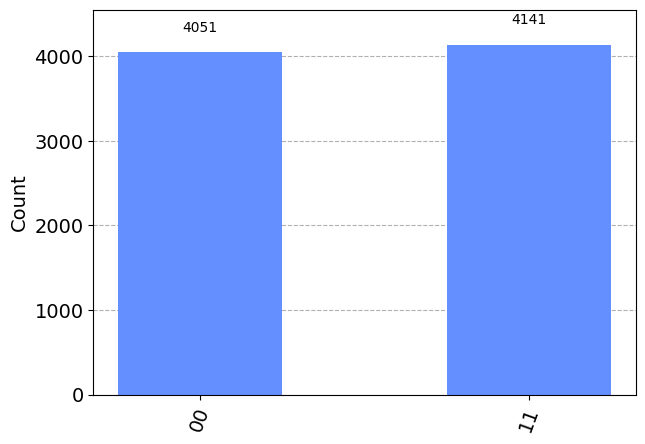

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 8192)

results = job.result()
plot_histogram(results.get_counts(qc))

In [6]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit

job = backend.run(qc)

/tmp/ipykernel_223/2219823291.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_belem


In [5]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job incurred error  


In [6]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

Traceback (most recent call last):
  Cell In[6], line 2
    result = job.result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:285 in result
    error_message = self.error_message()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:525 in error_message
    self._retrieve_result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:952 in _retrieve_result
    self._set_result(result_response)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:985 in _set_result
    raise IBMQJobApiError(
IBMQJobApiError: "Unable to retrieve result for job chcur81mfb1ddb64ffc0: 'results'"

Use %tb to get the full traceback.


In [ ]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")